# Hotel Booking Demand
This data set contains booking information for a city hotel, a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

We found this data set on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand) but the data is originally from the article [Hotel Booking Demand Datasets - ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) written in journal named [Data in Brief](https://www.sciencedirect.com/journal/data-in-brief), Volume 22, February 2019. 
The subject area of this data is **hospitality management**. This data was acquired by extraction from hotel's Property Management System (PMS) SQL databases from 2015 to 2017. **Both hotels are located in Portugal**.

Since this is hotel real data, all data elements pertaining hotel or customer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, as well as in other fields.

The Goals are:
- Find out what lead into high cancellation rate for hotels;
- Maximize resources within hotels.


# 1) Preparing Essential Library Package and Data Set

## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Glance of Data Set

In [ ]:
hotel = pd.read_csv("hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 2) Explaination of Each Column
- define each column and its content;
- checking its data type;
- sum of null values;
- description of each column.

In [ ]:
col_detail = ["Hotel (H1 = Resort Hotel or H2 = City Hotel).", 
              "Value indicating if the booking was canceled (1) or not (0).",
              "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.",
              "Year of arrival date.",
              "Month of arrival date.",
              "Week number of year for arrival date.",
              "Day of arrival date.",
              "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.",
              "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.",
              "Number of adults.",
              "Number of children.",
              "Number of babies.",
              "Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).",
              "Country of origin. Categories are represented in the ISO 3155–3:2013 format.",
              "Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Value indicating if the booking name was from a repeated guest (1) or not (0).",
              "Number of previous bookings that were cancelled by the customer prior to the current booking.",
              "Number of previous bookings not cancelled by the customer prior to the current booking.",
              "Code of room type reserved. Code is presented instead of designation for anonymity reasons.",
              "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.",
              "Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.",
              "Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.",
              "ID of the travel agency that made the booking.",
              "ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.",
              "Number of days the booking was in the waiting list before it was confirmed to the customer.",
              "Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.",
              "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.",
              "Number of car parking spaces required by the customer.",
              "Number of special requests made by the customer (e.g. twin bed or high floor).",
              "Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.",
              "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel."]

hotel_descr = []
j = 0
for name in hotel.columns:
  hotel_descr.append(
      [
       name,
       hotel[name].dtypes,
       hotel[name].isnull().sum(),
       round(hotel[name].isnull().sum()/len(hotel)*100, 2),
       hotel[name].nunique(),
       hotel[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

hotel_column_desc = pd.DataFrame(hotel_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(hotel.columns)} columns.")

Total column of this data set is: 32 columns.


In [ ]:
# hotel_column_desc.style.set_properties(subset=['Description'], **{'width':'300px'})
hotel_column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]",Hotel (H1 = Resort Hotel or H2 = City Hotel).
1,is_canceled,int64,0,0.00,2,"[0, 1]",Value indicating if the booking was canceled (...
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...",Number of days that elapsed between the enteri...
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]",Year of arrival date.
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D...",Month of arrival date.
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",Week number of year for arrival date.
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",Day of arrival date.
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...",Number of weekend nights (Saturday or Sunday) ...
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...",Number of week nights (Monday to Friday) the g...
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]",Number of adults.


# 3) Handling Missing Value
Columns which have null values are:
- 'children'
- 'country'
- 'agent'
- 'company'

## Children Column
Number of children.

In [ ]:
# Description of 'children' column
hotel_column_desc.iloc[10]

Column                                children
Dtype                                  float64
Null                                         4
Null (%)                                     0
nUnique                                      5
Unique         [0.0, 1.0, 2.0, 10.0, 3.0, nan]
Description                Number of children.
Name: 10, dtype: object

In [ ]:
# Showing row which has null value on 'children' column
hotel[hotel['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [ ]:
# FUNCTION TO SHOW TABLE OF VALUE COUNTS WITH ITS PERCENTAGE

def table_of_value(column_name, data):
  temp = []
  for unique in data[column_name].unique():
    if pd.notna(unique):
      temp.append([
                   unique,
                   data[column_name].value_counts()[unique],
                   round(data[column_name].value_counts()[unique]/len(data)*100, 3)
      ])
    else:
      temp.append([
                   unique,
                   data[column_name].isnull().sum(),
                   round(data[column_name].isnull().sum()/len(data)*100, 3)
      ])

  return pd.DataFrame(data = temp, columns = ['Unique Value', 'Value Counts', 'Value Counts (%)'])

In [ ]:
# Showing Table of Value Counts of 'children' column with its percentage

desc_children = table_of_value('children', hotel)
desc_children

,Unique Value,Value Counts,Value Counts (%)
0,0.0,110796,92.802
1,1.0,4861,4.072
2,2.0,3652,3.059
3,10.0,1,0.001
4,3.0,76,0.064
5,NaN,4,0.003


In [ ]:
# Univariate Analysis of 'children' column
hotel['children'].describe().to_frame()

,children
count,119386.000000
mean,0.103890
std,0.398561
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


In [ ]:
# df_children = pd.DataFrame(data = {
#                                     'Unique' : [i for i in sorted(hotel['children'].unique()[:-1])],
#                                     'Value Counts' : [i for i in hotel['children'].value_counts()],
#                                     'Value Counts (%)' : [round(i, 2) for i in hotel['children'].value_counts()/len(hotel)*100]
#                                    })

# pd.isna(hotel['children'].unique()[5])
# df_children

In [ ]:
# Fill Null/NaN value with Most Frequent
  # Why? Because if we look at Univariate Analysis of 'children' column, we see that its mean or median says '0'. 
  # Means that its value is dominated by '0' value

# hotel['children'].fillna(hotel['children'].mode(), inplace = True)
# ^ aneh zenmeyang raiso cara iki

from sklearn.impute import SimpleImputer
imputer_most = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

print(f"There are {hotel['children'].isnull().sum()} null value in 'children' column before imputation.")
print("="*25, "Imputing....", "="*25)

hotel['children'] = imputer_most.fit_transform(hotel['children'].values.reshape(-1,1))
hotel['children'] = hotel['children'].astype(int)
print(f"There are {hotel['children'].isnull().sum()} null value in 'children' column.")

There are 4 null value in 'children' column before imputation.
========================= Imputing.... =========================
There are 0 null value in 'children' column.


## Country Column

In [ ]:
hotel_column_desc.iloc[13]

Column                                                   country
Dtype                                                     object
Null                                                         488
Null (%)                                                    0.41
nUnique                                                      177
Unique         [PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ...
Description    Country of origin. Categories are represented ...
Name: 13, dtype: object

In [ ]:
hotel[hotel['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [ ]:
# Showing Table of Value Counts of 'country' column with its percentage
desc_country = table_of_value('country', hotel)
desc_country.head(7)

,Unique Value,Value Counts,Value Counts (%)
0,PRT,48590,40.699
1,GBR,12129,10.159
2,USA,2097,1.756
3,ESP,8568,7.176
4,IRL,3375,2.827
5,FRA,10415,8.724
6,NaN,488,0.409


In [ ]:
# Univariate Analysis of 'country' column
hotel['country'].describe().to_frame()

,country
count,118902
unique,177
top,PRT
freq,48590


In [ ]:
print(f"There are {hotel['country'].isnull().sum()} null value in 'country' column before imputation.")
print("="*25, "Imputing....", "="*25)

hotel['country'] = imputer_most.fit_transform(hotel['country'].values.reshape(-1,1))
print(f"There are {hotel['country'].isnull().sum()} null value in 'country' column after imputation.")

There are 488 null value in 'country' column before imputation.
========================= Imputing.... =========================
There are 0 null value in 'country' column after imputation.


## Agent and Company Column

In [ ]:
hotel_column_desc.iloc[23:25]

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
23,agent,float64,16340,13.69,333,"[nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 2...",ID of the travel agency that made the booking.
24,company,float64,112593,94.31,352,"[nan, 110.0, 113.0, 270.0, 178.0, 240.0, 154.0...",ID of the company/entity that made the booking...


In [ ]:
desc_agent = table_of_value('agent', hotel)
desc_agent

,Unique Value,Value Counts,Value Counts (%)
0,NaN,16340,13.686
1,304.0,1,0.001
2,240.0,13922,11.661
3,303.0,2,0.002
4,15.0,402,0.337
...,...,...,...
329,459.0,16,0.013
330,474.0,17,0.014
331,475.0,8,0.007
332,480.0,1,0.001


In [ ]:
desc_company = table_of_value('company', hotel)
desc_company

,Unique Value,Value Counts,Value Counts (%)
0,NaN,112593,94.307
1,110.0,52,0.044
2,113.0,36,0.030
3,270.0,43,0.036
4,178.0,27,0.023
...,...,...,...
348,229.0,1,0.001
349,481.0,1,0.001
350,497.0,1,0.001
351,451.0,6,0.005


In [ ]:
# Agent -- ID of the travel agency that made the booking.
# Company -- ID of the company/entity that made the booking.
# ID of travel agency or company isn't obvious, 
  # they consist of ID number that represents the name of Travel Agency or Company 
  # but since it's confidential we don't really know what its name and kind of useless to use this column
  # so we drop this 2 columns

print(f"There are {len(hotel.columns)} columns before dropping process.")
print("="*25, "Dropping Columns....", "="*25)

hotel.drop(['agent', 'company'], axis = 1, inplace = True)
print(f"There are {len(hotel.columns)} columns after dropping process.")

There are 32 columns before dropping process.
========================= Dropping Columns.... =========================
There are 30 columns after dropping process.


# 4) Feature Engineering
Column that has date object:
- arrival_date_year
- arrival_date_month               
- arrival_date_week_number        
- arrival_date_day_of_month       
- stays_in_weekend_nights         
- stays_in_week_nights 
- reservation_status_date

## arrival_date

In [ ]:
# hotel['arrival_date'] = hotel[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].agg('-'.join, axis=1)
hotel['arrival_date'] = hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str)
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date'])

print(f"The type of 'arrival_date' column is {hotel['arrival_date'].dtypes}.")

The type of 'arrival_date' column is datetime64[ns].


In [ ]:
hotel['arrival_month'] = hotel['arrival_date'].dt.month
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7


In [ ]:
hotel['arrival_day'] = hotel['arrival_date'].dt.day_name()
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday


In [ ]:
hotel['arrival_year'] = hotel['arrival_date'].dt.year
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015


## booking_date

In [ ]:
import datetime as dt
# hotel['lead_time'] = hotel['lead_time'].apply(lambda x: dt.timedelta(days = x)) 
hotel['booking_date'] = hotel['arrival_date'] - hotel['lead_time'].apply(lambda x: dt.timedelta(days = x))

print(f"The type of 'booking_date' column is {hotel['booking_date'].dtypes}.")

The type of 'booking_date' column is datetime64[ns].


## duration

In [ ]:
hotel['duration'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
print(f"The type of 'duration' column is {hotel['duration'].dtypes}.")

The type of 'duration' column is int64.


## reservation_status_date

In [ ]:
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
print(f"The type of 'reservation_status_date' column is {hotel['reservation_status_date'].dtypes}.")

The type of 'reservation_status_date' column is datetime64[ns].


## meal
In the description column, 'SC' and 'Undefined' has same meaning. So we try to change 'Undefined' into 'SC'.

In [ ]:
hotel['meal'].replace('Undefined', 'SC', inplace = True)
hotel['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

## guests

In [ ]:
hotel['guest'] = hotel['adults'] + hotel['children'] + hotel['babies']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,booking_date,duration,guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2014-07-24,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2013-06-24,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-06-24,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-06-18,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-06-17,2,2


In [ ]:
hotel.drop(labels = hotel[hotel['guest'] == 0].index, axis = 0, inplace = True)
hotel[hotel['guest'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,booking_date,duration,guest


## Drop Existing Column
After did a feature engineering on datetime object, we are not using existing feature anymore like:
-  arrival_date_year
-  arrival_date_month
-  arrival_date_week_number
-  arrival_date_day_of_month
-  stays_in_weekend_nights
-  stays_in_week_nights
- adults
- children
- babies

In [ ]:
print(f"There are {len(hotel.columns)} columns before dropping process.")
print("="*25, "Dropping Columns....", "="*25)

hotel.drop(['arrival_date_year', 
            'arrival_date_month', 
            'arrival_date_week_number', 
            'arrival_date_day_of_month', 
            'stays_in_weekend_nights', 
            'stays_in_week_nights',
            'adults',
            'children',
            'babies'], axis = 1, inplace = True)
print(f"There are {len(hotel.columns)} columns after dropping process.")

There are 37 columns before dropping process.
========================= Dropping Columns.... =========================
There are 28 columns after dropping process.


# 5) Descriptive Analysis

In [ ]:
hotel_nc = hotel[hotel['is_canceled'] == 0]
hotel_nc
# dataset for further analysis purposes

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,booking_date,duration,guest
0,Resort Hotel,0,342,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2014-07-24,0,2
1,Resort Hotel,0,737,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2013-06-24,0,2
2,Resort Hotel,0,7,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-06-24,1,1
3,Resort Hotel,0,13,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-06-18,1,1
4,Resort Hotel,0,14,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-06-17,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,8,Wednesday,2017,2017-08-07,7,2
119386,City Hotel,0,102,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,8,Thursday,2017,2017-05-21,7,3
119387,City Hotel,0,34,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,8,Thursday,2017,2017-07-28,7,2
119388,City Hotel,0,109,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,8,Thursday,2017,2017-05-14,7,2


## Numerical

In [ ]:
 def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    (credits to pandas.pydata.org)
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
# numerical
describe_num = hotel.describe().T
describe_num

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.370766,0.483012,0.00,0.0,0.00,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.00,18.0,69.00,161.0,737.0
is_repeated_guest,119210.0,0.031499,0.174663,0.00,0.0,0.00,0.0,1.0
previous_cancellations,119210.0,0.087191,0.844918,0.00,0.0,0.00,0.0,26.0
previous_bookings_not_canceled,119210.0,0.137094,1.498137,0.00,0.0,0.00,0.0,72.0
booking_changes,119210.0,0.218799,0.638504,0.00,0.0,0.00,0.0,18.0
days_in_waiting_list,119210.0,2.321215,17.598002,0.00,0.0,0.00,0.0,391.0
adr,119210.0,101.969092,50.434007,-6.38,69.5,94.95,126.0,5400.0
required_car_parking_spaces,119210.0,0.062553,0.245360,0.00,0.0,0.00,0.0,8.0
total_of_special_requests,119210.0,0.571504,0.792876,0.00,0.0,0.00,1.0,5.0


## Most Beneficial Room by Guest

In [ ]:
pd.crosstab(hotel_nc['guest'], hotel_nc['assigned_room_type'], hotel_nc['adr'], aggfunc='mean').style.apply(highlight_max, axis = None)

# di sini terlihat bahwa Room G dengan tamu 5 orang memiliki rate rata-rata harian tertinggi dibandingkan dengan room lainnya

assigned_room_type,A,B,C,D,E,F,G,H,I,K
guest,,,,,,,,,,
1,77.875278,88.919040,64.339248,70.610070,84.558360,79.523695,91.524126,55.850000,22.471600,64.984043
2,95.936051,93.289820,92.327497,98.017589,106.661862,119.406402,126.303903,111.419159,37.123021,66.969545
3,130.137899,117.999213,112.310791,141.283630,157.683296,176.541617,160.961880,165.422500,76.361304,98.663750
4,124.919375,140.640000,167.502178,147.270000,175.426581,191.515581,188.231877,188.087149,104.390476,210.110000
5,nan,82.233333,151.345000,nan,120.000000,208.540000,242.717164,182.061905,nan,nan
10,nan,95.000000,nan,nan,nan,nan,nan,nan,nan,nan
12,nan,nan,nan,84.450000,nan,nan,nan,nan,nan,nan


## Most Favorable Room by Guest

In [ ]:
pd.crosstab(hotel_nc['guest'], hotel_nc['assigned_room_type'], hotel_nc['adr'], aggfunc='count').style.apply(highlight_max, axis = None)

# terlihat bahwa room A dengan tamu 2 orang adalah yang paling banyak diminati

assigned_room_type,A,B,C,D,E,F,G,H,I,K
guest,,,,,,,,,,
1,10661.000000,323.000000,226.000000,3413.000000,860.000000,249.000000,143.000000,29.000000,75.000000,47.000000
2,28620.000000,1168.000000,955.000000,12118.000000,4103.000000,1484.000000,579.000000,107.000000,235.000000,110.000000
3,1780.000000,127.000000,392.000000,3388.000000,716.000000,334.000000,266.000000,76.000000,23.000000,16.000000
4,16.000000,21.000000,349.000000,27.000000,155.000000,749.000000,714.000000,228.000000,21.000000,3.000000
5,nan,3.000000,2.000000,nan,2.000000,8.000000,67.000000,21.000000,nan,nan
10,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan
12,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan


## Repeated Guest by Hotel Type

In [ ]:
pd.crosstab([hotel['hotel'], hotel['is_canceled']],
            hotel['is_repeated_guest'])

# notice that Resort Hotel's repeated  guest is more than The City Hotel

is_repeated_guest             0     1
hotel        is_canceled             
City Hotel   0            44546  1538
             1            32640   439
Resort Hotel 0            27260  1667
             1            11009   111

## Percentage of Cancelation Booking by Hotel Type

In [ ]:
pd.crosstab(hotel['hotel'], hotel['is_canceled'])

# value counts terhadap perbandingan hotel dan cancelation

is_canceled,0,1
hotel,,
City Hotel,46084,33079
Resort Hotel,28927,11120


In [ ]:
pd.crosstab(hotel['hotel'], hotel['is_canceled'], normalize = 'index')*100

# persentase dari perbandingan hotel dan cancelation

is_canceled,0,1
hotel,,
City Hotel,58.214065,41.785935
Resort Hotel,72.232627,27.767373


## Guest and Their Total Stays

In [ ]:
pd.crosstab(hotel['guest'], 
            hotel['duration']
            ).style.apply(highlight_max, axis = None)

# Terlihat bahwa booking hotel didominasi oleh tamu 2 orang dengan lama tinggal selama 2 malam

duration,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,33,34,35,38,42,45,46,48,56,60,69
guest,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,200,7641,5660,4362,1961,860,463,771,168,87,98,42,22,34,95,32,13,0,6,8,7,10,5,7,4,1,1,1,4,6,7,0,0,2,0,0,1,0,0,0,1,1
2,394,11402,19515,19446,12881,5534,2662,6449,771,591,850,289,171,86,729,35,22,18,25,11,6,57,7,1,2,36,4,3,29,5,4,3,1,3,1,4,0,1,1,2,0,0
3,35,1340,1784,2439,1905,994,483,998,135,103,130,46,18,16,53,3,4,1,2,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,15,592,645,784,607,374,231,412,79,56,55,16,9,4,35,2,1,1,2,2,1,3,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,1,30,26,30,17,9,7,9,2,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Categorical

In [ ]:
# kategorikal
describe_obj = hotel.describe(include='object').T
describe_obj

,count,unique,top,freq
hotel,119210,2,City Hotel,79163
meal,119210,4,BB,92236
country,119210,177,PRT,48961
market_segment,119210,8,Online TA,56408
distribution_channel,119210,5,TA/TO,97750
reserved_room_type,119210,9,A,85873
assigned_room_type,119210,11,A,74020
deposit_type,119210,3,No Deposit,104461
customer_type,119210,4,Transient,89476
reservation_status,119210,3,Check-Out,75011


# 6) Data Visualization

## Univariate

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,booking_date,duration,guest
0,Resort Hotel,0,342,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2014-07-24,0,2
1,Resort Hotel,0,737,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2013-06-24,0,2
2,Resort Hotel,0,7,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-06-24,1,1
3,Resort Hotel,0,13,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-06-18,1,1
4,Resort Hotel,0,14,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-06-17,2,2


### Reservation Status

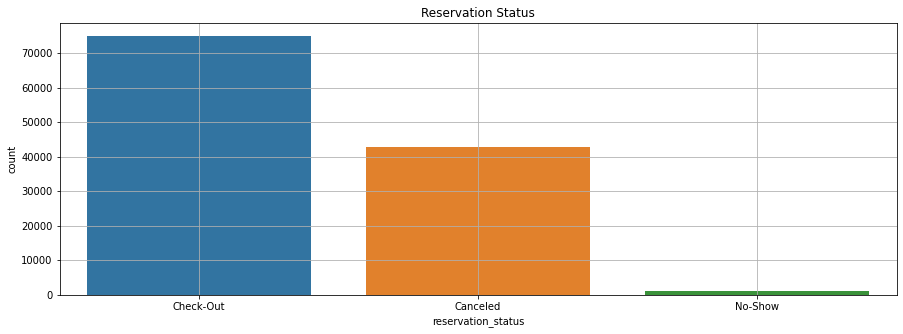

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'reservation_status', data = hotel)
plt.title("Reservation Status")
plt.grid(True)
plt.show()

# terlihat bahwa tamu yang menyelesaikan penginapannya hingga check-out masih lebih banyak dibandingkan tamu yang membatalkan penginapannya

### Distribution Channel

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


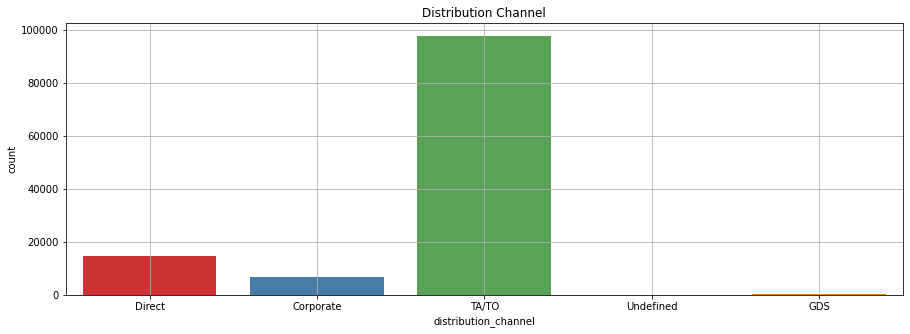

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(hotel['distribution_channel'], palette = 'Set1')
plt.title("Distribution Channel")
plt.grid(True)
plt.show()

# Terlihat bahwa booking distribution channel paling banyak adalah melalui Travel Agent Online maupun Offline

### Number of Guest

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


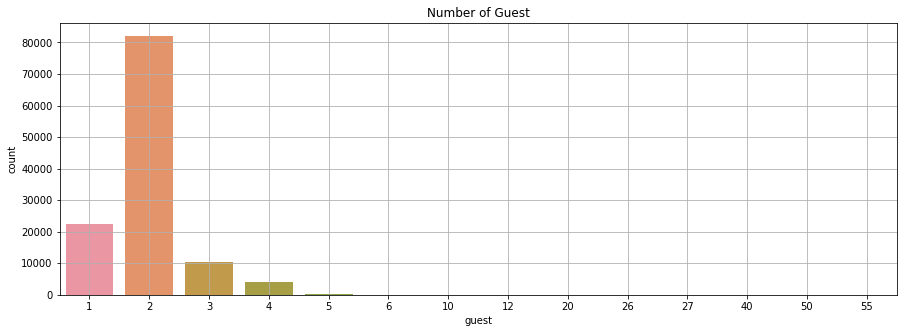

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(hotel['guest'])
plt.title("Number of Guest")
plt.grid(True)
plt.show()

# Terlihat bahwa jumlah tamu yang sering menginap adalah 2 orang

### Distribution of lead_time Column

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


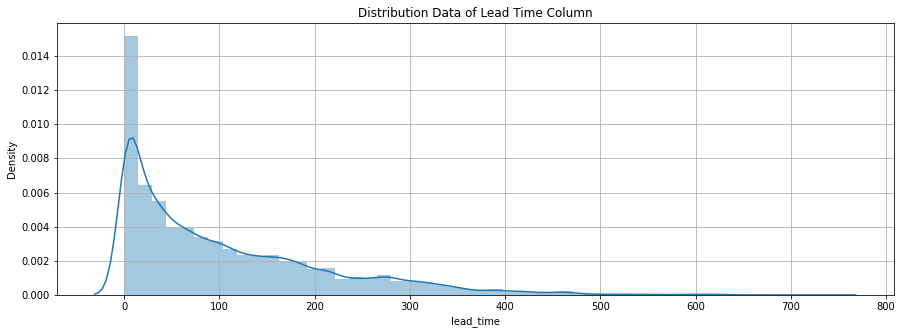

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(hotel['lead_time'])
plt.title("Distribution Data of Lead Time Column")
plt.grid(True)
plt.show()

# terlihat bahwa distribusi data pada kolom lead time cenderung membentuk right-skewed distribution

### Distribution of adr Column

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


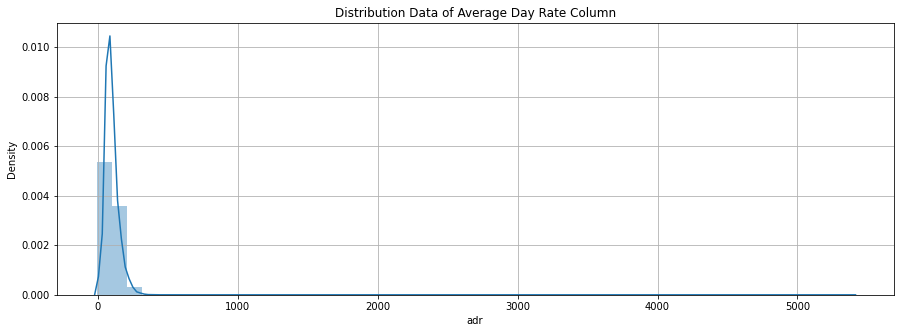

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(hotel['adr'])
plt.title("Distribution Data of Average Day Rate Column")
plt.grid(True)
plt.show()

# distribusi data pada kolom 'adr' juga menunjukkan right-skewed namun yang ini terlihat terlalu ekstrim karena nilai adr di bawah 500 sangat mendominasi

### Outliers of duration Column

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


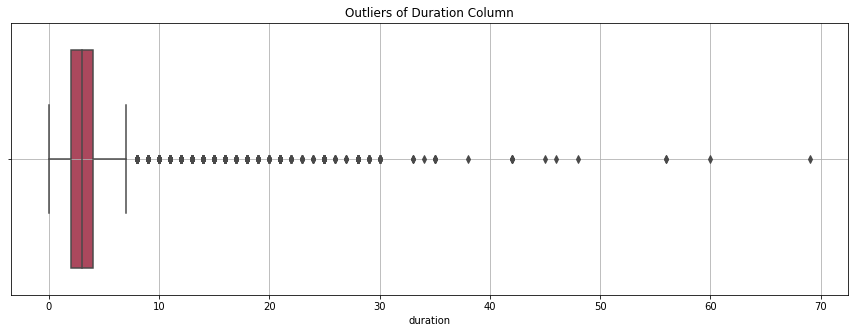

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(hotel['duration'], palette = 'inferno')
plt.title("Outliers of Duration Column")
plt.grid(True)
plt.show()

# outliers pada kolom duration mulai terlihat di sekitar angka 7-8

### Outliers of guest Column

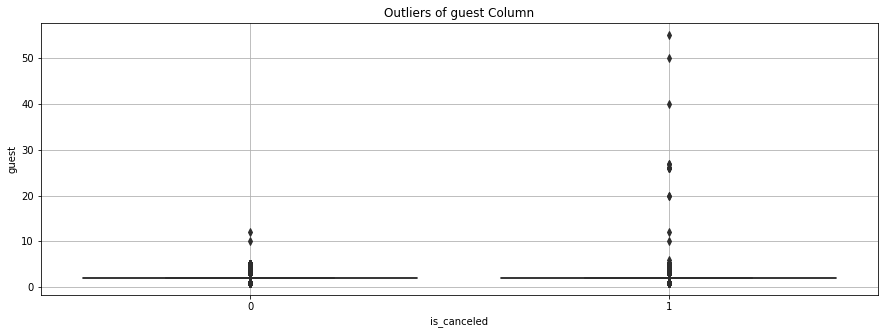

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y = hotel['guest'], x = hotel['is_canceled'], palette = 'inferno')
plt.title("Outliers of guest Column")
plt.grid(True)
plt.show()

# outliers pada tamu sangatlah banyak mengingat persebaran data menumpuk pada nilai 2

###Top 10 Country Hotel Booking

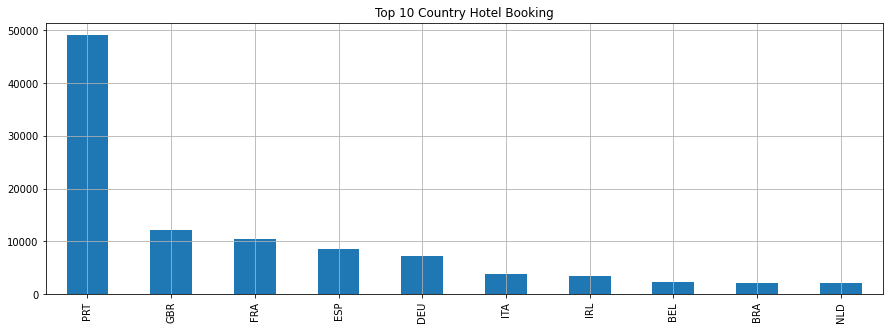

In [ ]:
plt.figure(figsize=(15,5))
hotel['country'].value_counts().head(10).plot(kind = 'bar')
plt.title("Top 10 Country Hotel Booking")
plt.grid(True)
plt.show()

# 10 negara teratas yang melakukan booking paling banyak

### Hotel Guest Arrival by Day

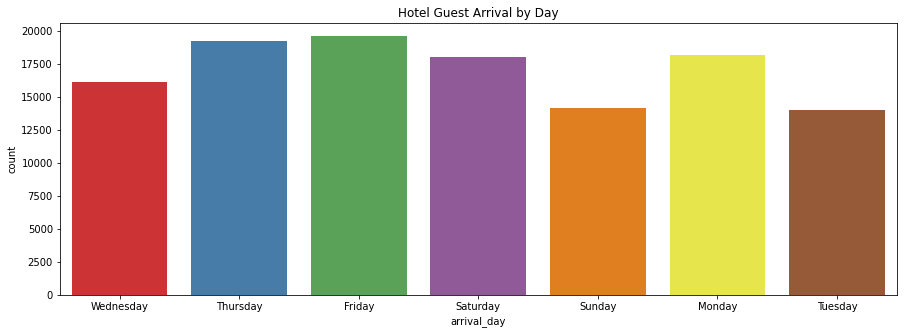

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel, x = 'arrival_day',palette = 'Set1')
plt.title("Hotel Guest Arrival by Day")
plt.show()

# Generally, we can anticipate our team on Thursday, Friday, Saturday, and Monday
# because these days is the beginning of their time to stay

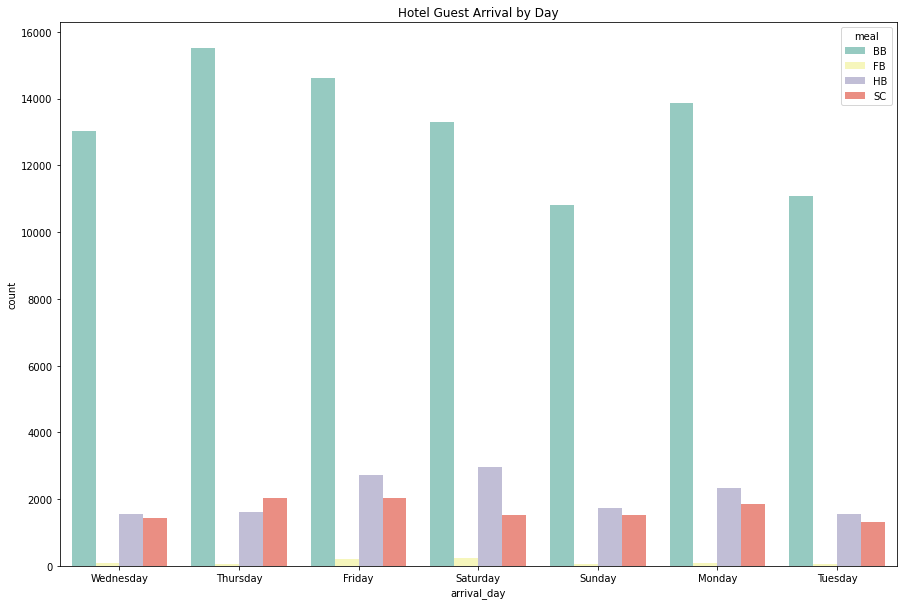

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel, x = 'arrival_day', hue = 'meal', palette = 'Set3')
plt.title("Hotel Guest Arrival by Day")
plt.show()

# Terlihat bahwa Bed Breakfast adalah pilihan yang paling banyak dipilih di setiap harinya.

### Stay Hotel Length (Nights)

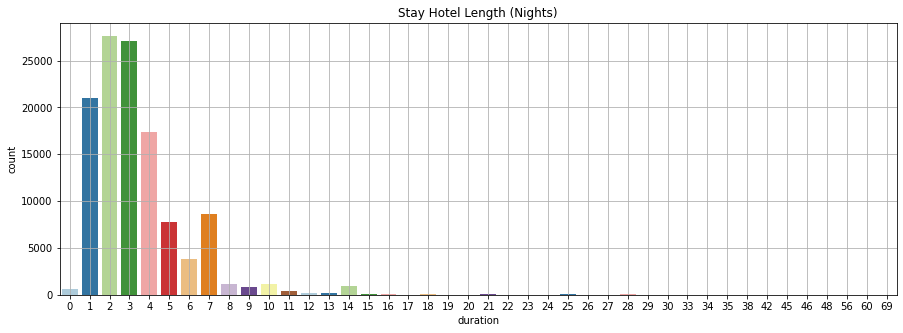

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel, x = 'duration', palette = 'Paired')
plt.title("Stay Hotel Length (Nights)")
plt.grid(True)
plt.show()

# Guest paling banyak menginap selama 2 malam, 3 malam, 1 malam, 4 malam, dan 7 malam

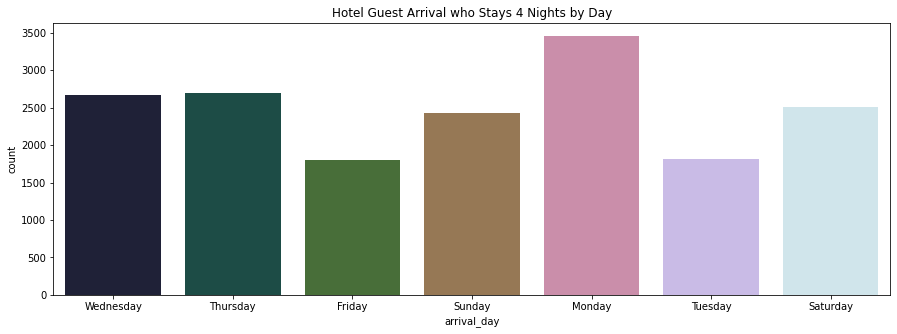

In [ ]:
# let's take a look on guest who stays 4 nights
plt.figure(figsize = (15,5))
sns.countplot(data = hotel[hotel['duration'] == 4], x = 'arrival_day',palette = 'cubehelix')
plt.title("Hotel Guest Arrival who Stays 4 Nights by Day")
plt.show()

# ternyata guest yg check in untuk 4 malam lebih banyak memulainya di hari Senin
# Jika memulai dari Senin untuk 4 malam, penginapan mereka berakhir pada hari Jumat

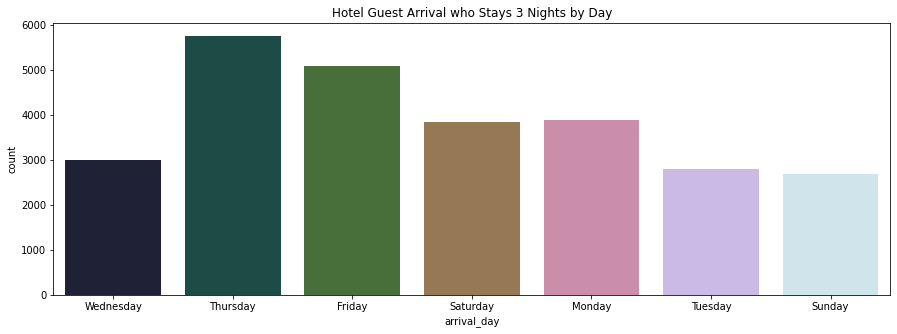

In [ ]:
# let's take a look on guest who stays 3 nights
plt.figure(figsize = (15,5))
sns.countplot(data = hotel[hotel['duration'] == 3], x = 'arrival_day',palette = 'cubehelix')
plt.title("Hotel Guest Arrival who Stays 3 Nights by Day")
plt.show()

# berbeda dengan guest yg booking untuk 3 malam
# guest paling banyak memulai menginap di hari Kamis
# jika mulai hari Kamis maka akan berakhir di Minggu

## Multivariate

###Relationship Between Guest and Average Daily Rate

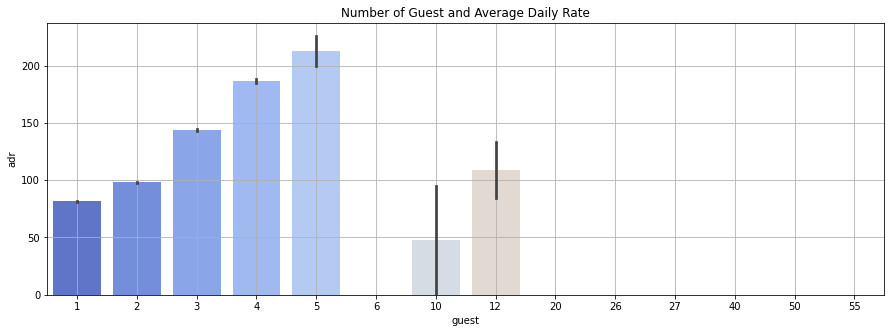

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'guest', y = 'adr', data = hotel, palette = 'coolwarm')
plt.title("Number of Guest and Average Daily Rate")
plt.grid(True)
plt.show()

# terlihat bahwa booking dengan 5 orang menghasilkan nilai 'adr' paling tinggi

### Correlation Between Each Feature

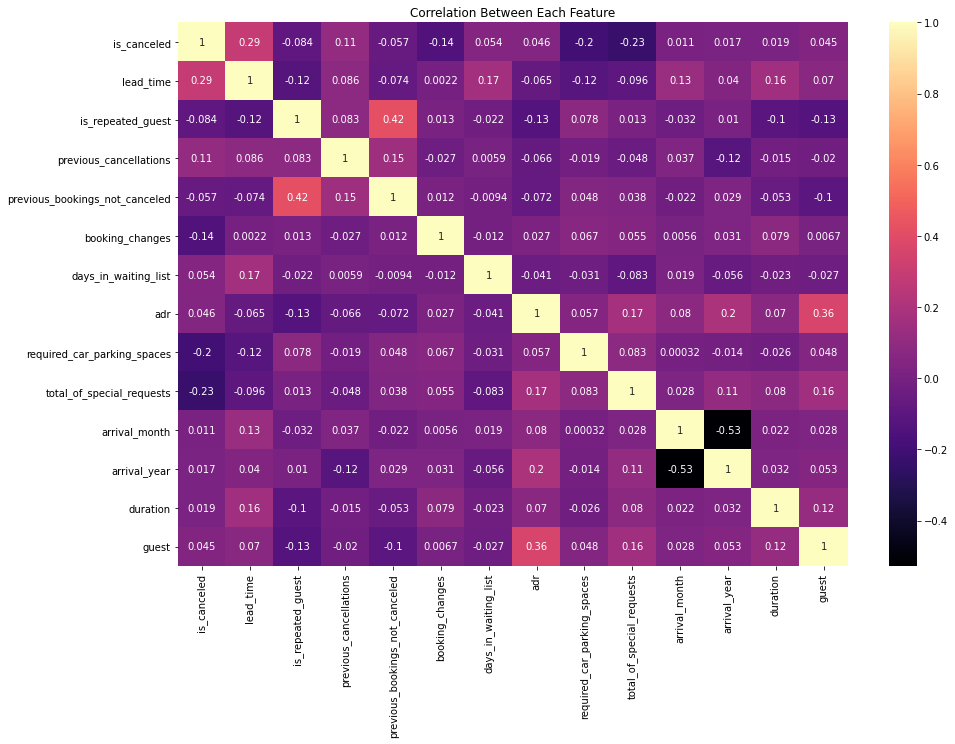

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(hotel.corr(), cmap = 'magma', annot = True)
plt.title("Correlation Between Each Feature")

plt.show()

# terlihat bahwa terdapat korelasi kuat antara 'total stays' dengan 'stays_in_wwek_nights' dan 'stays_in_weekend_nights'. Hal ini wajar mengingat kolom tersebut merupakan ekstraksi dari keduanya.
# begitu juga antara 'adr' dgn 'total spending'
# sebesar 0.29, korelasi is_canceled dengan lead_time. Meski kecil namun terlihat sangat berpengaruh ketika kita melihat visualisasi-visualisasi sebelumnya.

### Comparison of Canceled Booking by Hotel Type

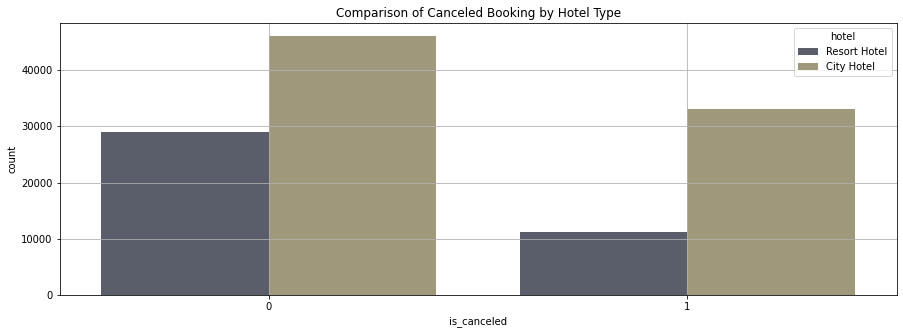

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'is_canceled', data = hotel, hue = 'hotel', palette = 'cividis')
plt.title("Comparison of Canceled Booking by Hotel Type")
plt.grid(True)
plt.show()

# Terlihat bahwa City Hotel tetap lebih dominan untuk booking yang dibatalkan maupun yang tidak

### Busy Season by Month

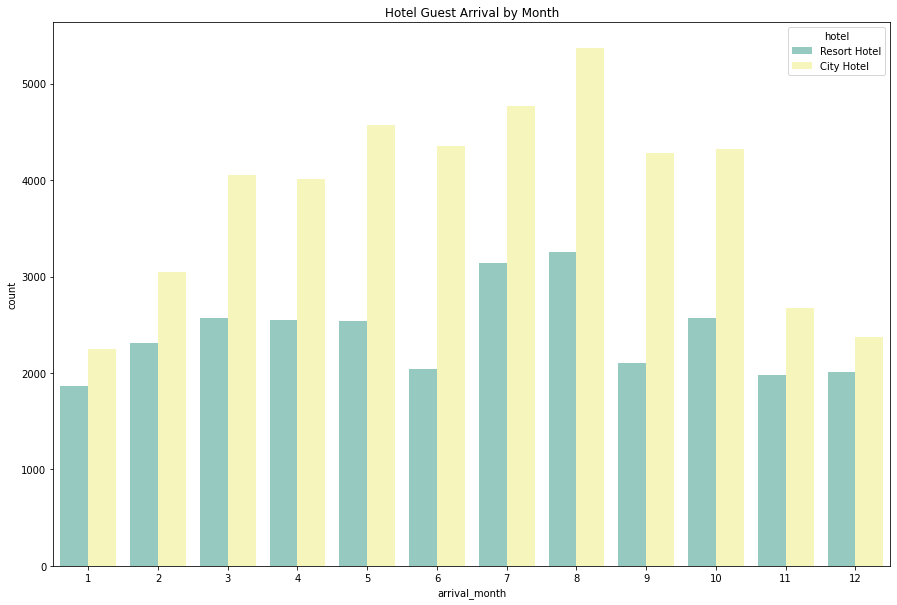

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel_nc, x = 'arrival_month', hue = 'hotel',palette = 'Set3')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# Whether Resort or City Hotel, Q2-Q3 has its peak. Take a look on July-August.
# Both Resort and City has same up-trend

# The interesting fact is, notice in November and December bar.
# The City Hotel is going down, while Resort Hotel is going up.
# We see that people tend to spend their holidays on the Hotel with sceneric view, eventhough by number the City Hotel is still the most booked.

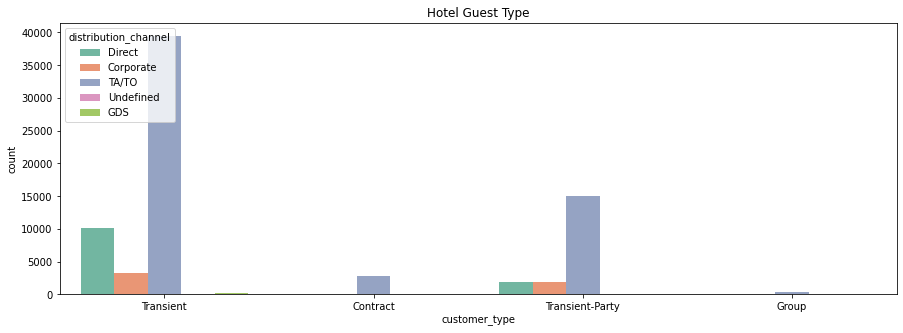

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_nc, x = 'customer_type', hue = 'distribution_channel', palette = 'Set2')
plt.title("Hotel Guest Type")
plt.show()

# Contract - when the booking has an allotment or other type of contract associated to it; 
# Group – when the booking is associated to a group; 
# Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
# Transient-party – when the booking is transient, but is associated to at least other transient booking."

# we see that 'transient' is the most type that booked the hotel. We know now that most guests is not part of a group or a contract, and isn't associated to other transient booking

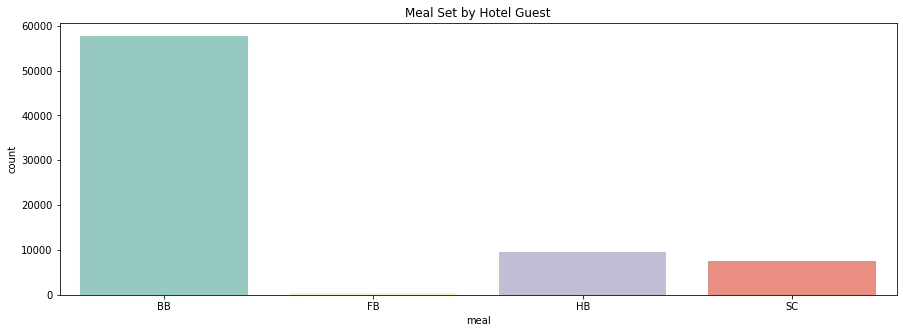

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_nc, x = 'meal', palette = 'Set3')
plt.title("Meal Set by Hotel Guest")
plt.show()

# BB is Bed & Breakfast
# HB is Half Board -- Breakfast + one meal (usually dinner)
# SC is no meal package
# FB is Full Board -- Breakfast, Lunch, Dinner

# we see that 'BB' is the most choice by guest. In the other hand, 'HB' and 'SC' were choosen by guests.

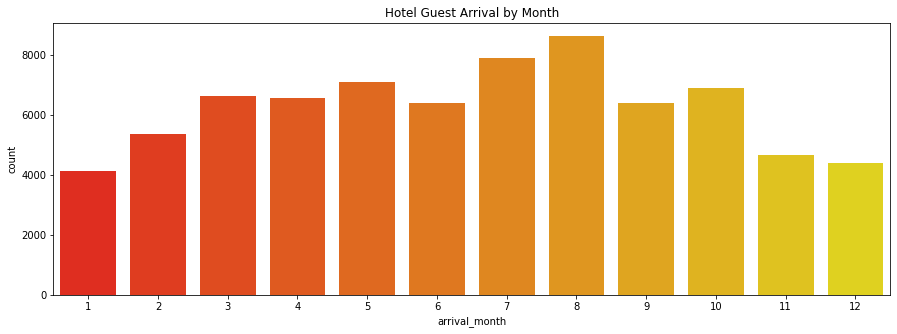

In [ ]:
# using this graph because this dataset only has data starts from Q3-Q4 2015 until Q1-Q2 2017, so we sum it up.

plt.figure(figsize = (15,5))
sns.countplot(data = hotel_nc, x = 'arrival_month', palette = 'autumn')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# Terlihat bahwa bulan Juli dan Agustus adalah bulan yang banyak didatangi oleh guests untuk mulai menginap

In [ ]:
bymonth = hotel_nc.groupby('arrival_month').count()
bymonth

# dataset yang tidak terjadi cancelation kemudian di-groupby berdasarkan 'arrival_month'

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day,arrival_year,booking_date,duration,guest
arrival_month,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115
2,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359
3,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620
4,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560
5,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103
6,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395
7,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907
8,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624
9,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385


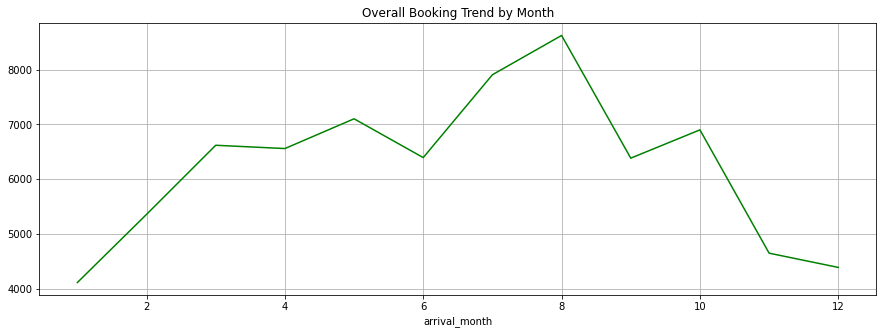

In [ ]:

plt.figure(figsize = (15,5))
bymonth['hotel'].plot(color = 'green')
plt.title("Overall Booking Trend by Month")
plt.grid(True)
plt.show()

#  Trend line sepanjang 12 bulan
# terlihat puncaknya ada di bulan Agustus, Juli, Mei, dan Oktober

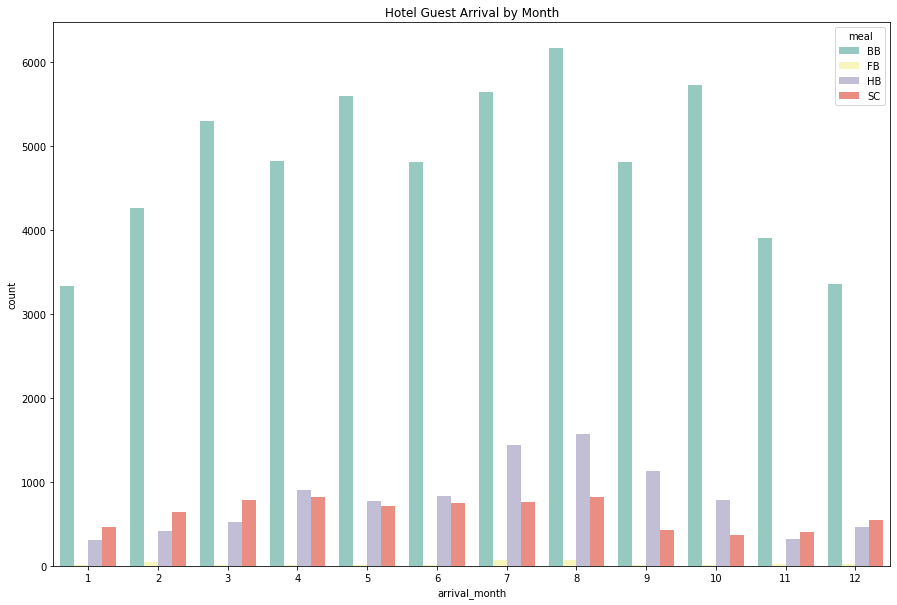

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel_nc, x = 'arrival_month', hue = 'meal',palette = 'Set3')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# We see that guests tend to book the room with 'BB' package.
# While 'HB' and 'SC' is vary depends on the month
# Take a look on July-August, they have 'HB' more than 'SC'.
# But when we look on November-March, guests tend to 'SC' rather than 'HB'
# We understand when we approach holiday months or earlier year, guests tend to have a room but they have their own agenda to enjoy the city or hangout to other places.

In [ ]:
byDay = hotel_nc.groupby(['arrival_day','arrival_month']).count()
# byDay
bymonth_day = byDay['hotel'].unstack(level = -1)
bymonth_day

# dilakukan groupby berdasarkan 'arrival_day' dan 'arrival_month' untuk menampilkan heatmap dan cluster map

arrival_month,1,2,3,4,5,6,7,8,9,10,11,12
arrival_day,,,,,,,,,,,,
Friday,564,943,1063,1044,779,1191,1099,1144,1127,1113,865,695
Monday,703,781,977,1004,1314,954,1261,1578,982,1099,831,479
Saturday,642,1059,723,1174,786,733,1476,1281,746,829,620,839
Sunday,485,692,776,840,980,859,1088,1135,770,1109,466,362
Thursday,562,691,1268,834,1218,1084,1107,1135,988,1074,565,775
Tuesday,613,540,818,719,1110,736,900,1146,819,794,607,574
Wednesday,546,653,995,945,916,838,976,1205,953,883,697,667


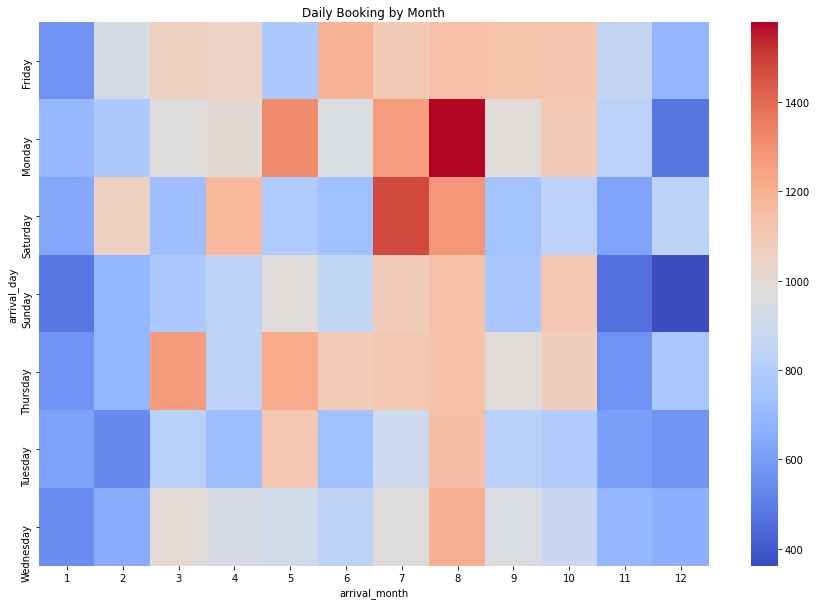

In [ ]:

plt.figure(figsize = (15,10))
sns.heatmap(bymonth_day, cmap = 'coolwarm')
plt.title("Daily Booking by Month")
plt.show()

# terlihat bahwa Check-in terbanyak ada pada bulan Juli dan Agustus, terutama setiap hari Sabtu dan Senin
# Manajemen hotel bisa berkoordinasi dengan tim restoran di mana berdasarkan grafik terlihat guest lebih banyak datang pada bulan Juli dan Agustus. 
# Terutama pada hari Sabtu dan Senin adalah puncak di mana guest berdatangan.
# Tim Restoran dapat menambah resources pada bahan makanan maupun tenaga kerja untuk melayani dengan maksimal namun efisien

<Figure size 1080x720 with 0 Axes>

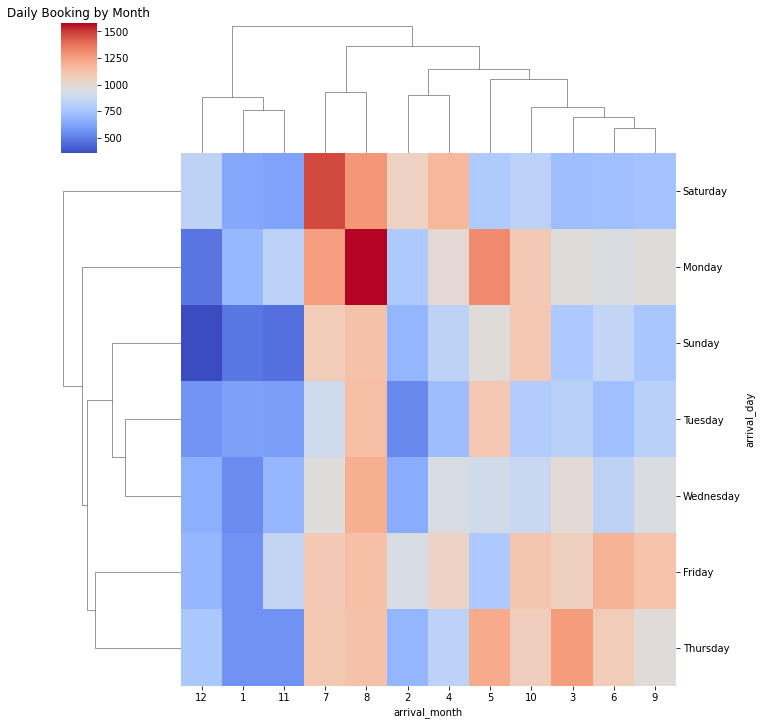

In [ ]:

plt.figure(figsize = (15,10))
sns.clustermap(bymonth_day, cmap = 'coolwarm')
plt.title("Daily Booking by Month")
plt.show()

# terlihat bahwa Check-in terbanyak ada pada bulan Juli dan Agustus, terutama setiap hari Sabtu dan Senin
# di cluster map ini terlihat kontras bahwa bulan November, Desember, dan Januari malah memiliki jumlah guest yang jauh lebih sepi dibandingkan bulan-bulan lainnya
# Hal ini bisa disiasati bahwa meminimalisir resources makanan maupun tenaga kerja dapat dilakukan pada bulan-bulan tersebut untuk efisiensi keuangan maupun kesegaran bahan makanan